# Homework 10
任课老师：胡俊峰

负责助教：陈滨琪、杨礼铭

注意：仅需要提交.ipynb文件，请**不要**将下发压缩包中的其他文件一并交上。

截止日期：4月9日24点

# 0、特征工程与特征筛选
本数据集是已经整理拼接好的数据集，包含了rock, pop, rap三个音乐种类的歌曲的音频特征。

特征部分是用的Spotify的api提供的音频分析数据，已经由原音频文件特征工程得来（如果大家对音频分析感兴趣，可以去搜一下[librosa](http://librosa.org/doc/latest/index.html)包，是专业分析音频的包。12个音频特征如下: acousticness, danceability, durationms, energy, instrumentalness, key, liveness, loudness, mode, speechiness, tempo, valence.具体含义参考[链接](https://developer.spotify.com/web-api/get-audio-features/)。

我们的目标是通过音频特征来预测歌曲的种类，但是对于音频特征来说，12个特征全部使用的效果并不好，可以通过EDA(Exploratory Data Analysis)来查看数据情况，进行初步的人工筛选，下面给出一个EDA的例子。

In [4]:
import pandas as pd
import random

import seaborn as sns
import matplotlib.pyplot as plt
import warnings

random.seed(1)
warnings.filterwarnings('ignore')
data = pd.read_csv('./data/songs.csv')

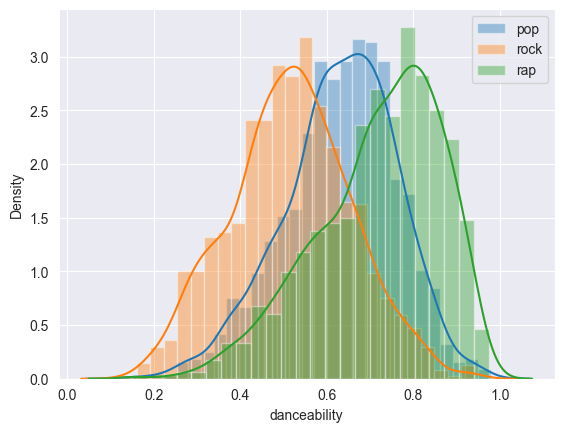

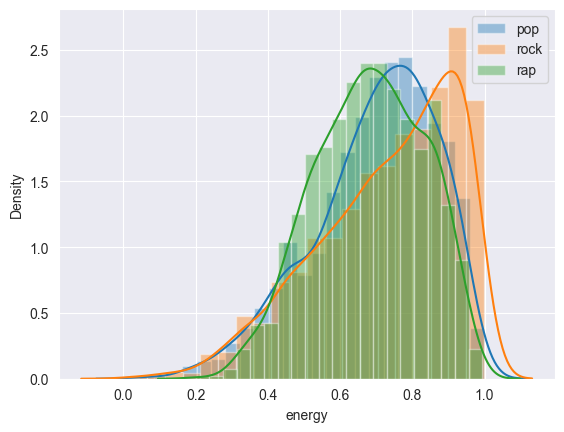

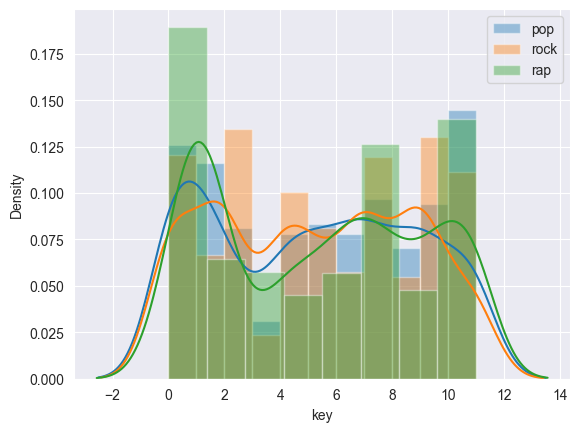

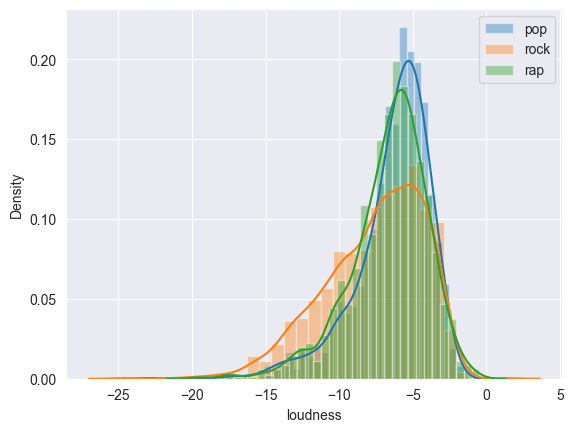

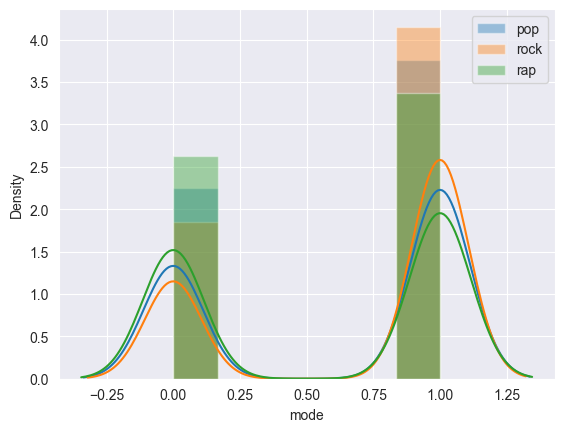

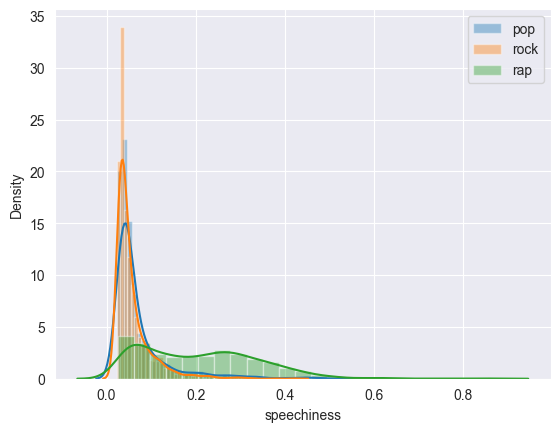

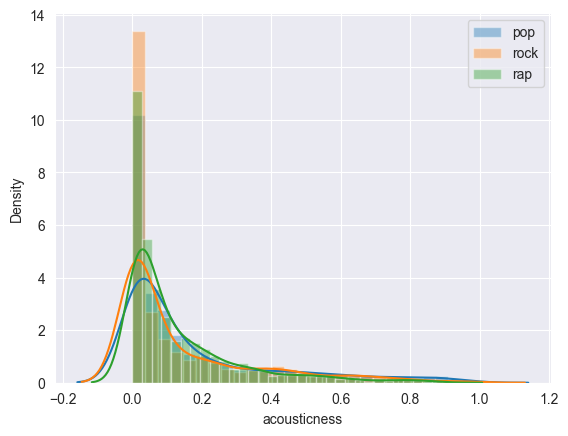

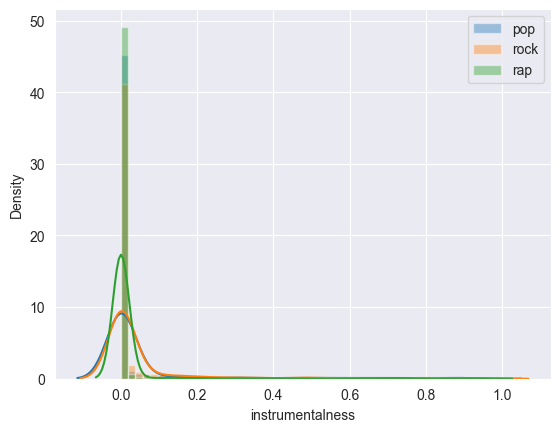

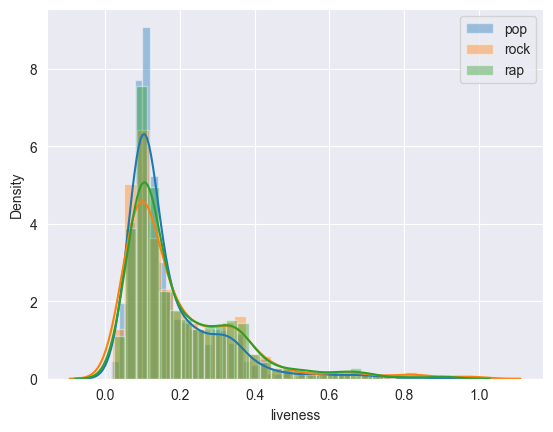

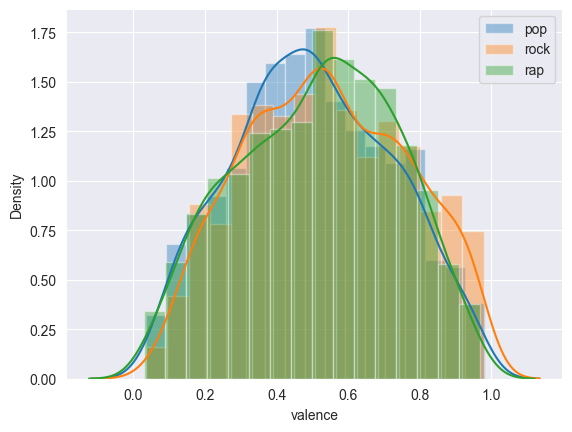

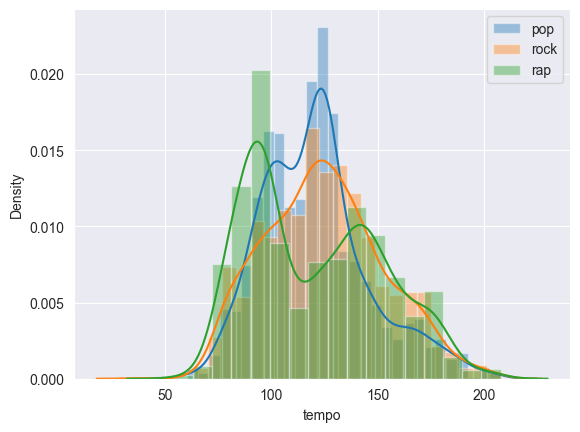

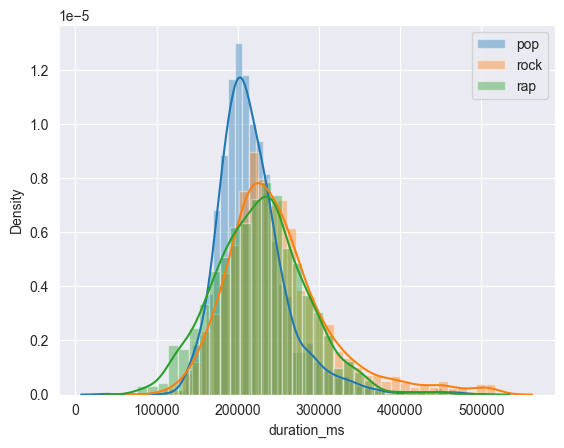

In [2]:
# 观察不同歌曲类别的每个特征的分布
def plot_density(feature):
    sns.distplot(data[data['playlist_genre']=='pop'][feature],label = 'pop')
    sns.distplot(data[data['playlist_genre']=='rock'][feature],label = 'rock')
    sns.distplot(data[data['playlist_genre']=='rap'][feature],label = 'rap')
    plt.legend()
    plt.show()
for feature in ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms']:
       plot_density(feature)

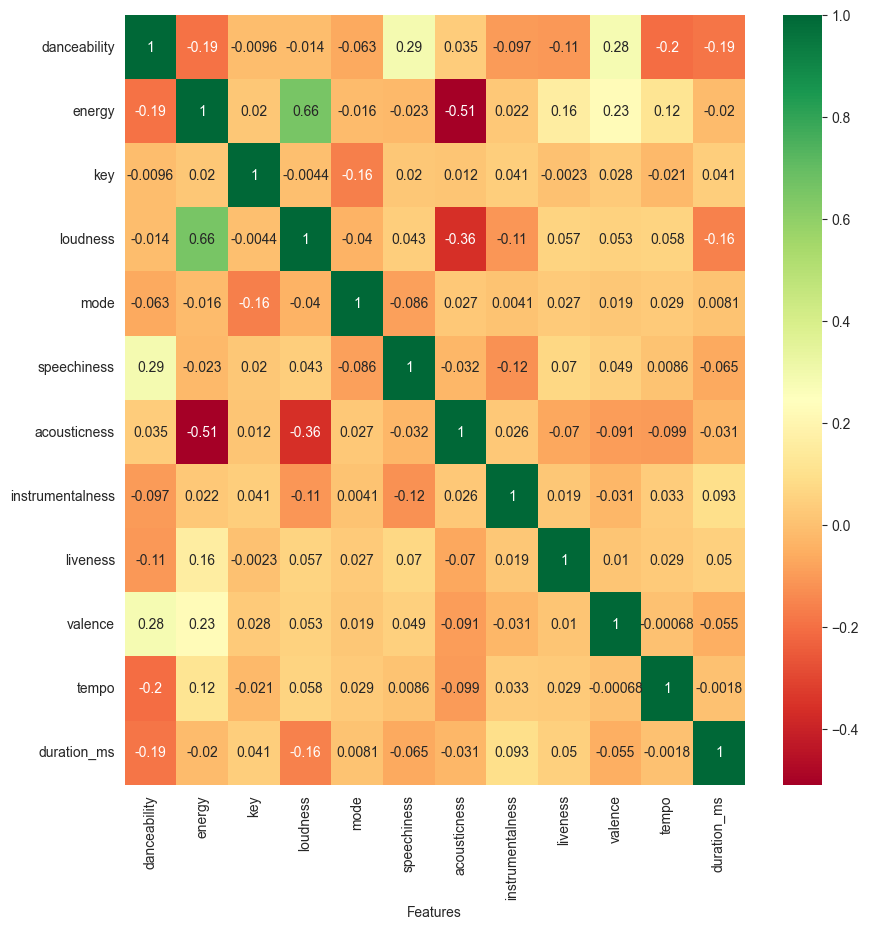

In [3]:
#绘制热力图观察特征之间的相关性
f,ax = plt.subplots(figsize = (10,10)) 
sns.heatmap(data.loc[:,['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo','duration_ms']].corr(), annot = True, fmt = '.2g', cmap = 'RdYlGn', ax= ax)
sns.set(font_scale = 0.75) 
plt.xlabel('Features')
plt.show()

# 一、数据预处理 - 归一化、标准化和正交化
### 1.1: 数据归一化、标准化（1分）
请手动实现数据归一化、标准化函数，这部分不允许使用sklearn中的相关函数。
- 请实现函数normalize_data对数据进行归一化处理，将数据的取值范围缩放到[0, 1]。
- 实现函数standardize_data对数据进行标准化处理，使每个特征的均值为0，标准差为1。

In [2]:
import numpy as np
np.random.seed(1)
data = np.random.rand(100,2) * 100

In [6]:

def normalize(data, axis=None):
    low = np.min(data, axis=axis)
    high = np.max(data, axis=axis)
    data = (data - low) / (high - low)
    return data
    
def standardize(data, axis=None):
    data = data - np.average(data, axis=axis)
    var = np.var(data, axis=axis)
    data = data * (var ** -0.5)
    return data
    

normalized_data = np.stack([normalize(data[:, i], axis=0) for i in range(data.shape[1])], axis=1)
standardized_data = np.stack([standardize(data[:, i], axis=0) for i in range(data.shape[1])], axis=1)


# Use sklearn functions to compare results
from sklearn.preprocessing import MinMaxScaler, StandardScaler

min_max_scaler = MinMaxScaler()
std_scaler = StandardScaler()

normalized_data_sklearn = min_max_scaler.fit_transform(data)
standardized_data_sklearn = std_scaler.fit_transform(data)

assert np.allclose(normalized_data, normalized_data_sklearn)
assert np.allclose(standardized_data, standardized_data_sklearn)

### 1.2: 数据正交化（0.5分）
请使用sklearn中的PCA得到数据正交化结果

In [12]:
from sklearn.decomposition import PCA


A = PCA(n_components=2)
orthogonalized_data = A.fit_transform(data)

### 1.3 结果可视化（1.5分）
请使用matplotlib中的二维散点图可视化三者对数据处理后得到的结果

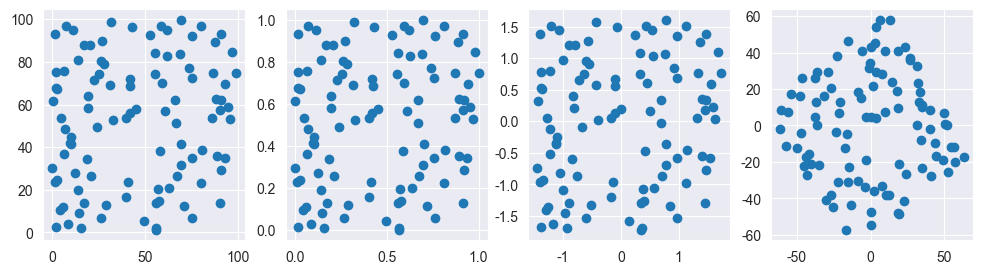

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 3))
plt.rc('axes', unicode_minus=False)
# Plot original data
plt.subplot(1, 4, 1)


plt.scatter(data[:,0], data[:,1])
# Plot normalized data
plt.subplot(1, 4, 2)

plt.scatter(normalized_data[:,0], normalized_data[:,1])
# Plot standardized data
plt.subplot(1, 4, 3)

plt.scatter(standardized_data[:,0], standardized_data[:,1])
# Plot orthogonalized data
plt.subplot(1, 4, 4)

plt.scatter(orthogonalized_data[:,0], orthogonalized_data[:,1])
plt.show()

### 1.4 对比归一化、标准化和正交化处理对K-means聚类的影响（2分）
对原始数据、归一化处理后的数据、标准化处理后的数据和正交化处理后的数据分别进行K-means聚类，聚集成三类。比较四种数据处理方法对聚类效果的影响。请使用[轮廓系数（Silhouette Score）](https://zhuanlan.zhihu.com/p/530944459)评估聚类结果的质量。

Silhouette Score (Original Data): 0.4061957785447291
Silhouette Score (Normalized Data): 0.40609375798356995
Silhouette Score (Standardized Data): 0.40412238908205417
Silhouette Score (Orthogonalized Data): 0.4061957785447291


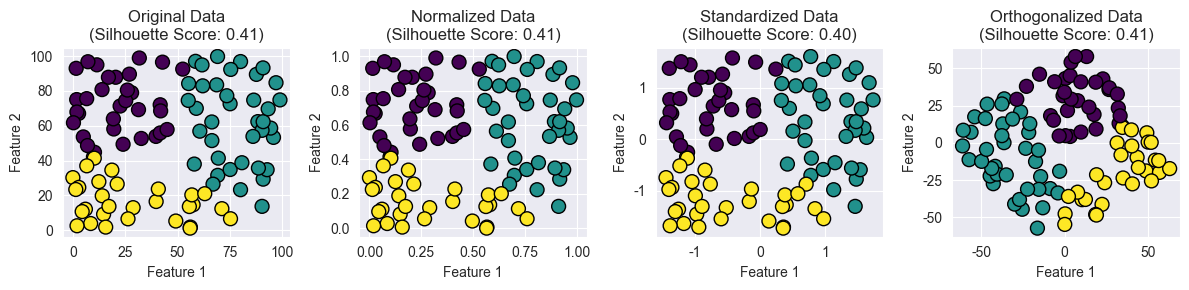

In [17]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

n_clusters = 3
random_state = 20230403

# Original data
kmeans = KMeans(n_clusters=n_clusters, random_state=random_state).fit(data)
y_pred_orig = kmeans.predict(data)
silhouette_orig = silhouette_score(data, y_pred_orig)

# Normalized data
kmeans = KMeans(n_clusters=n_clusters, random_state=random_state).fit(normalized_data)
y_pred_norm = kmeans.predict(normalized_data)
silhouette_norm = silhouette_score(normalized_data, y_pred_norm)

# Standardized data
kmeans = KMeans(n_clusters=n_clusters, random_state=random_state).fit(standardized_data)
y_pred_std = kmeans.predict(standardized_data)
silhouette_std = silhouette_score(standardized_data, y_pred_std)

# Orthogonalized data
kmeans = KMeans(n_clusters=n_clusters, random_state=random_state).fit(orthogonalized_data)
y_pred_orth = kmeans.predict(orthogonalized_data)
silhouette_orth = silhouette_score(orthogonalized_data, y_pred_orth)

# Output silhouette scores
print("Silhouette Score (Original Data):", silhouette_orig)
print("Silhouette Score (Normalized Data):", silhouette_norm)
print("Silhouette Score (Standardized Data):", silhouette_std)
print("Silhouette Score (Orthogonalized Data):", silhouette_orth)

# Visualization
fig, axes = plt.subplots(1, 4, figsize=(12, 3))
axes = axes.ravel()

datasets = [data, normalized_data, standardized_data, orthogonalized_data]
titles = ["Original Data", "Normalized Data", "Standardized Data", "Orthogonalized Data"]
cluster_labels = [y_pred_orig, y_pred_norm, y_pred_std, y_pred_orth]

for i, (ax, dataset, title, labels) in enumerate(zip(axes, datasets, titles, cluster_labels)):
    ax.scatter(dataset[:, 0], dataset[:, 1], c=labels, cmap='viridis', edgecolors='k', s=100)
    ax.set_title(f"{title}\n(Silhouette Score: {silhouette_score(dataset, labels):.2f})")
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")

plt.tight_layout()
plt.show()

# 二、电影推荐
推荐系统的应用范围很广，其中协同过滤是基础的一种，由于1M数据计算相似度矩阵易遇上内存问题，我们将在MovieLens 100k上实现简单的协同过滤（User-based/Item-Based）。

#### 读取数据

user数， movies数目， 决定了rating矩阵大小

In [18]:
import numpy as np
import pandas as pd

# Reading ratings file
ratings = pd.read_csv('data/ratings2.csv',  encoding='latin-1', usecols=['user_id', 'movie_id', 'rating', 'timestamp'])

# Reading users file
users = pd.read_csv('data/users.csv', encoding='latin-1', usecols=['user_id', 'gender', 'zipcode', 'age_desc', 'occ_desc'])

# Reading movies file
movies = pd.read_csv('data/movies.csv',  encoding='latin-1', usecols=['movie_id', 'title', 'genres'])

ratings.head()

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [28]:
n_users = ratings.user_id.unique().shape[0]
n_movies = ratings.movie_id.unique().shape[0]
print ('Number of users = ' + str(n_users) + ' | Number of movies = ' + str(n_movies))
ratings.describe()

Number of users = 6040 | Number of movies = 3706


,user_id,movie_id,rating,timestamp
count,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06
mean,3.024512e+03,1.865540e+03,3.581564e+00,9.722437e+08
std,1.728413e+03,1.096041e+03,1.117102e+00,1.215256e+07
min,1.000000e+00,1.000000e+00,1.000000e+00,9.567039e+08
25%,1.506000e+03,1.030000e+03,3.000000e+00,9.653026e+08
50%,3.070000e+03,1.835000e+03,4.000000e+00,9.730180e+08
75%,4.476000e+03,2.770000e+03,4.000000e+00,9.752209e+08
max,6.040000e+03,3.952000e+03,5.000000e+00,1.046455e+09


#### 使用Sklearn 将一部分数据分为测试集

In [1]:
from sklearn import model_selection
train_data, test_data = model_selection.train_test_split(ratings, test_size=0.25, random_state=1)

NameError: name 'ratings' is not defined

#### 2.1 生成User-Movies二维rating矩阵（0.5分）
仿照数据矩阵的生成，生成测试集矩阵

In [26]:
# 填写数据矩阵
train_data_matrix = np.array(train_data.pivot_table('rating', index='user_id', columns='movie_id', aggfunc='mean').fillna(0))

# 填写测试集矩阵
test_data_matrix = np.array(test_data.pivot_table('rating', index='user_id', columns='movie_id', aggfunc='mean').fillna(0))

train_data_matrix[0:3,:] #每行为一个用户的观影评分向量

array([[5., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

#### 2.2 计算  user-user 相似度矩阵  和 item-item 相似度矩阵（0.5分）
计算相似度矩阵，可以使用[pairwise_distances](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise_distances.html#sklearn.metrics.pairwise_distances)

In [29]:
from sklearn.metrics.pairwise import pairwise_distances
user_similarity = pairwise_distances(train_data_matrix, metric='cosine')   # 用户

# 生成电影相似度矩阵
item_similarity = pairwise_distances(train_data_matrix.T, metric='cosine')

assert user_similarity.shape == (6040, 6040) 
assert item_similarity.shape == (3682, 3682)

#### 2.3 通过相似度矩阵进行预测
基于课件上已经实现的预测函数，对电影的数据做中心化，观察结果有无差异（2分）

In [30]:
def predict(train_ratings, similarity, type='user'):
    if type == 'user':
        mean_user_rating = train_ratings.mean(axis=1) # 平均分
        ratings_diff = (train_ratings - mean_user_rating[:, np.newaxis]) # 评分向量中心化，
        # 通过相似度矩阵生成推荐，然后再把中心偏置加回来
        pred = mean_user_rating[:, np.newaxis] + \
            similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T #  user_sim
        
    elif type == 'item':
         # item_sim
        # 这里尝试对电影的属性做一下中心化，观察结果数据有无改善
        mean_item_rating = train_ratings.mean(axis=0)
        ratings_diff = train_ratings - mean_item_rating[np.newaxis, :]
        pred = mean_item_rating[np.newaxis, :] + \
            ratings_diff.dot(similarity) / np.array([np.abs(similarity).sum(axis=0)])
    return pred

item_prediction = predict(train_data_matrix, item_similarity, type='item')
user_prediction = predict(train_data_matrix, user_similarity, type='user')
# 没啥改善
print(user_prediction.shape)
print(item_prediction.shape)

(6040, 3682)
(6040, 3682)


#### 评测
有很多评估指标，但其中一个最流行的指标是**根平均平方误差（RMSE）**，用于评估预测评级的准确性。本题将使用sklearn的**均方误差（MSE）**，RMSE只是MSE的平方根。

$$\mathit{RMSE} =\sqrt{\frac{1}{N} \sum (x_i -\hat{x_i})^2}$$

使用sklearn的**平均误差**函数作为验证指标，比较基于用户的协同过滤和基于项目的协同过滤，看起来基于用户的协同过滤的结果更好。

In [32]:
from sklearn.metrics import mean_squared_error
from math import sqrt

def rmse(prediction, ground_truth):
    prediction = prediction[ground_truth.nonzero()].flatten()  # 推荐结果 与 ground truth比较
    ground_truth = ground_truth[ground_truth.nonzero()].flatten()
    errorR = sqrt(mean_squared_error(prediction, ground_truth))
    
    return errorR

print('User-based CF RMSE: ' + str(rmse(user_prediction, test_data_matrix)))
print('Item-based CF RMSE: ' + str(rmse(item_prediction, test_data_matrix)))

User-based CF RMSE: 3.4956750190207013
Item-based CF RMSE: 3.4997160856162077


#### 2.4 用SVD分解和NMF分解的方法实现协同过滤
NMF分解的方法实现协同过滤已经实现，实现SVD分解的方法，推荐使用sklearn中的[TruncatedSVD](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html#sklearn.decomposition.TruncatedSVD)来实现，可以尝试调整参数能否取得更优的效果。（1分）

In [43]:
# 运行并观察结果
from sklearn.decomposition import NMF
model = NMF(13)                     # 13是调参调出来的
W = model.fit_transform(train_data_matrix)
H = model.components_
nmf_user_prediction = W @ H

# 用SVD实现推荐及评测：
from sklearn.decomposition import TruncatedSVD
model_svd = TruncatedSVD(11) # 已经过调参
w = model_svd.fit_transform(train_data_matrix)
h = model_svd.components_
svd_user_prediction = w @ h

print('notdo-anything CF RMSE: ' + str(rmse(train_data_matrix, test_data_matrix)))
print('nmf-user-based CF RMSE: ' + str(rmse(nmf_user_prediction, test_data_matrix)))
print('svd-user-based CF RMSE: ' + str(rmse(svd_user_prediction, test_data_matrix)))


notdo-anything CF RMSE: 3.622269783197127
nmf-user-based CF RMSE: 3.4932389466091283
svd-user-based CF RMSE: 3.508796262605346


#### 2.5（选做） 评价方案设计
本题采用了rmse作为评价指标，这种评价指标有什么问题？能否设计一种更好的评价方案（简单说明思路和道理+实现）（1分）

In [44]:
# 设计评价方案
# rmse：先平方求和再开方，放大了大误差(极端值)的影响。数据不直观。
from sklearn.metrics import mean_absolute_error, r2_score
def mae(prediction, ground_truth): # 平均绝对误差，对大误差的容忍更高
    prediction = prediction[ground_truth.nonzero()].flatten()
    ground_truth = ground_truth[ground_truth.nonzero()].flatten()
    errorR = mean_absolute_error(prediction, ground_truth) # 误差的绝对值的平均

    return errorR
def r_squared(prediction, ground_truth): # 比较模型和基准线性模型的差异，且指标范围在-100值100之间，比rmse更直观
    prediction = prediction[ground_truth.nonzero()].flatten()
    ground_truth = ground_truth[ground_truth.nonzero()].flatten()
    errorR = r2_score(prediction, ground_truth) # (1 - MSE/variance) * 100%
    return errorR
print('notdo-anything CF RMSE: ' + str(rmse(train_data_matrix, test_data_matrix)))
print('nmf-user-based CF RMSE: ' + str(rmse(nmf_user_prediction, test_data_matrix)))
print('svd-user-based CF RMSE: ' + str(rmse(svd_user_prediction, test_data_matrix)))
print('--------------------------------------------')
print('notdo-anything CF MAE: ' + str(mae(train_data_matrix, test_data_matrix)))
print('nmf-user-based CF MAE: ' + str(mae(nmf_user_prediction, test_data_matrix)))
print('svd-user-based CF MAE: ' + str(mae(svd_user_prediction, test_data_matrix)))
print('--------------------------------------------')
print('notdo-anything CF R2Score: ' + str(r_squared(train_data_matrix, test_data_matrix)))
print('nmf-user-based CF R2Score: ' + str(r_squared(nmf_user_prediction, test_data_matrix)))
print('svd-user-based CF R2Score: ' + str(r_squared(svd_user_prediction, test_data_matrix)))

notdo-anything CF RMSE: 3.622269783197127
nmf-user-based CF RMSE: 3.4932389466091283
svd-user-based CF RMSE: 3.508796262605346
--------------------------------------------
notdo-anything CF MAE: 3.378055852159342
nmf-user-based CF MAE: 3.2703013062413993
svd-user-based CF MAE: 3.2831397856729194
--------------------------------------------
notdo-anything CF R2Score: -11.280491510342795
nmf-user-based CF R2Score: -33.53645355451316
svd-user-based CF R2Score: -31.60262070933417


# 三、特征工程与特征筛选
本题使用第0题的歌曲数据集songs.csv。我们查看第0题的数据分布后，尝试筛选特征进行歌曲分类。
### 3.1 只使用danceability进行分类
阅读代码，学习如何使用使用[Logistic](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression)回归对歌曲种类进行分类，仅使用danceability特征。

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

data = pd.read_csv('./data/songs.csv')
#print(data)
X = data[['danceability']]
y = data['playlist_genre']

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 实现Logistic回归分类器的训练和预测
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# 计算并输出准确率
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy (danceability only):", accuracy)


Accuracy (danceability only): 0.5277777777777778


### 3.2 使用danceability、energy、key、speechiness、duration_ms共同进行分类（1分）

看起来，以上几个特征是还不错的选择。仿照3.1中的代码使用支持[向量机（SVM）](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.svm)对歌曲种类进行分类，使用danceability、energy、key、speechiness、duration_ms特征。



In [2]:
from sklearn.svm import SVC

# 完成对数据特征的筛选
X = data[['danceability','energy','key','speechiness','duration_ms']]
y = data['playlist_genre']

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 实现支持向量机分类器的训练和预测
model_svc = SVC()
model_svc.fit(X_train, y_train)
y_pred = model_svc.predict(X_test)

# 计算并输出准确率
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy (multiple features):", accuracy)


Accuracy (multiple features): 0.45


### 3.3（选做）特征筛选（1分）
对于音频特征，12个维度有点太过冗余了，实则12个特征全部直接使用效果也不好。我们如何选择出最合适的音频特征（3～5个）？应该对特征做什么样处理？参考第0题的可视化结果，寻找最佳特征组合，并以合理方式处理特征，在注释里写明选择的理由和处理的方式。要求最后打印在测试集上的classification_report和confusion matrix。在这一问中你可以只使用音频特征来进行朴素贝叶斯分类，也可以用你的方法结合音频和歌词文本特征。
提示：可以对比自己筛选出的特征与sklearn.feature_selection中的[SelectKBest](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest)函数筛选出的特征的效果。（以代码实现为主，不必纠结准确率）

              precision    recall  f1-score   support

         pop       0.59      0.62      0.60       308
         rap       0.77      0.67      0.71       275
        rock       0.74      0.78      0.76       317

    accuracy                           0.69       900
   macro avg       0.70      0.69      0.69       900
weighted avg       0.69      0.69      0.69       900



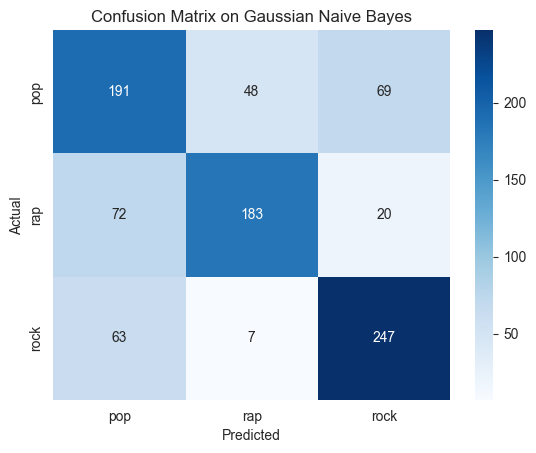

In [209]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.naive_bayes import GaussianNB
import numpy as np
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
# TODO:

X = data[['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'valence']]
y = data['playlist_genre']

# select k best
skb = SelectKBest(score_func=f_classif, k=5).fit(X, y)
skb_tags = np.array(['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'valence'])[skb.get_support()]
# print(skb_tags)
# got ['danceability' 'duration_ms' 'energy' 'loudness' 'speechiness']


X = data[['danceability','speechiness','loudness','energy','acousticness','valence']]
# 选择图像更加符合高斯分布、不同风格对应的曲线之间相距较远的特征
A = PCA(n_components=6)
X = A.fit_transform(X)
# 对特征正交化，提升1%左右准确率，（朴素贝叶斯假定特征之间无关）
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


clf = GaussianNB()
clf.fit(X_train, y_train)
nb_pred = clf.predict(X_test)
# 计算并输出准确率

print(classification_report(y_test, nb_pred))
import matplotlib.pyplot as plt
import seaborn as sns
con_matrix=pd.crosstab(pd.Series(y_test.values.flatten(),name='Actual'),pd.Series(nb_pred,name='Predicted'))
plt.title("Confusion Matrix on Gaussian Naive Bayes")
sns.heatmap(con_matrix,cmap="Blues",annot=True, fmt='g')
plt.show()